# Skymaps

In [1]:
###############################################################
# Fig-5: GW190521 skymaps
##############################################################
import pandas as pd
import itertools
import healpy as hp
from astropy.coordinates import SkyCoord
import matplotlib.pylab as plt
import numpy as np
# The astropy contour computations issue warnings that can be ignored:
import warnings
warnings.simplefilter('ignore', category=RuntimeWarning)

# LIGO-specific stuff from # https://pypi.org/project/ligo.skymap/
from ligo.skymap.io import fits
from ligo.skymap import plot
from ligo.skymap import postprocess

#####################
def plot_skymap(outfile, center, skymaps, printArea=False):
    

    if (center == None):
        fig = plt.figure(figsize=(9, 6))
        ax = fig.add_subplot(111, projection='astro degrees mollweide')
    else:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='astro globe',center=SkyCoord(center))
    ax.grid()
    font = {'family' : 'monospace','weight' : 'bold','size'   : 9}
    plt.rc('font', **font)  # pass in the font dict as kwargs

    # draw skymap 90% CI contours
    contour = [50,90]
    color_iter = itertools.cycle(['C0', 'C1', 'C2', 'C3'])
    line_styles = itertools.cycle(['--', '-', '-'])
    line_widths = itertools.cycle([1, 1, 2])
    for f, color, style, width in zip(skymaps, color_iter, line_styles, line_widths):
        skymap, metadata = fits.read_sky_map(f, nest=None)
        nside = hp.npix2nside(len(skymap))
        deg2perpix = hp.nside2pixarea(nside, degrees=True)
        # compute credible intervals from skymap
        cls = 100 * postprocess.find_greedy_credible_levels(skymap)

        # print sky area credible intervals
        if (printArea):
            print(f,', gps =',metadata['gps_time'],', gps_creation = ',metadata['gps_creation_time'],
                  ', distmean =',metadata['distmean'],', diststd =',metadata['diststd'])
            ci = 50
            pp = np.round(np.searchsorted(np.sort(cls), ci) * deg2perpix).astype(int)
            print('Sky area at',ci,'% probability =',pp,'sqdg')
            ci = 90
            pp = np.round(np.searchsorted(np.sort(cls), ci) * deg2perpix).astype(int)
            print('Sky area at',ci,'% probability =',pp,'sqdg')
        
        # plot credible interval contours
        cs = ax.contour_hpx((cls, 'ICRS'), nested=metadata['nest'],
            colors=color, linewidths=width, levels=contour, linestyles=style)

    plt.savefig(outfile)

#####################
# The skymap fits files relevant for GW190521 can be downloaded from
#!curl https://gracedb.ligo.org/apiweb/superevents/S190521g/files/bayestar.fits.gz,0 -o GW190521_bayestar.fits.gz
#!curl https://gracedb.ligo.org/apiweb/superevents/S190521g/files/LALInference.fits.gz,0 -o GW190521_LALInference_initial.fits.gz
#!curl https://dcc.ligo.org/DocDB/0169/P2000237/001/GW190521_lalinference_NRSur7dq4_final.fits.gz ./GW190521_lalinference_NRSur7dq4_final.fits.gz
# or get them all from:
#! curl https://dcc.ligo.org/public/0166/P2000158/002/GW190521_Implications_figure_data.tar -O | tar xvf -

fitspath = './'#'GW190521_Implications_figure_data/'
skymaps = [fitspath+'GW190521_bayestar.fits.gz',
           fitspath+'GW190521_LALInference_initial.fits.gz',
           fitspath+'GW190521_NRSur7dq4_skymap.fits.gz',
           fitspath+'GW190521_PhenomPv3HM_skymap.fits.gz',
           fitspath+'GW190521_SEOBNRv4PHM_skymap.fits.gz']



/home1/srashti.goyal/public_html/tgr-lensing/S190521g/27022022_tm_off_GR/samples/ProdF12_data0_1242442967-459473_analysis_H1L1V1_dynesty_merge_skymap.fits , gps = 1242442967.435035 , gps_creation =  1346023889.803682 , distmean = 4425.724383409772 , diststd = 1533.262199408067
Sky area at 50 % probability = 188 sqdg
Sky area at 90 % probability = 909 sqdg
/home1/srashti.goyal/public_html/tgr-lensing/S190521g/27022022_tm_off_nGR_py39/samples/ProdF12_data0_1242442967-459473_analysis_H1L1V1_merge_skymap.fits , gps = 1242442967.435758 , gps_creation =  1346610218.230713 , distmean = 5546.836531070482 , diststd = 1388.479682223445
Sky area at 50 % probability = 111 sqdg
Sky area at 90 % probability = 719 sqdg


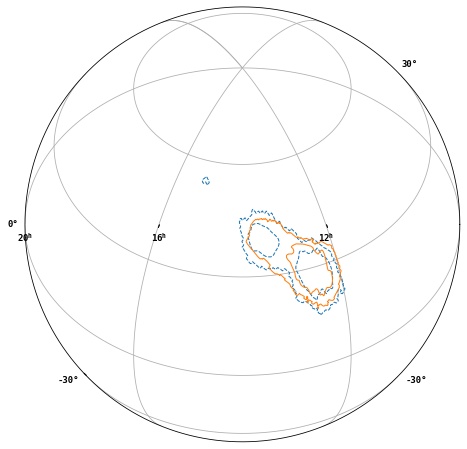

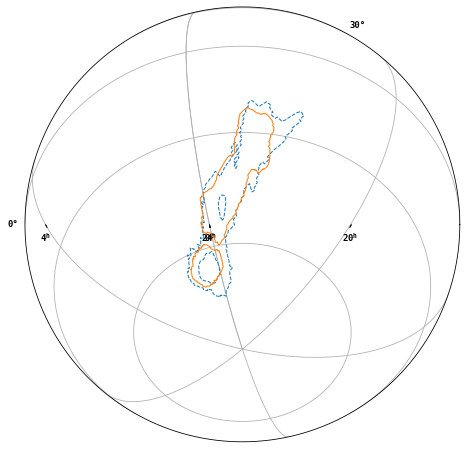

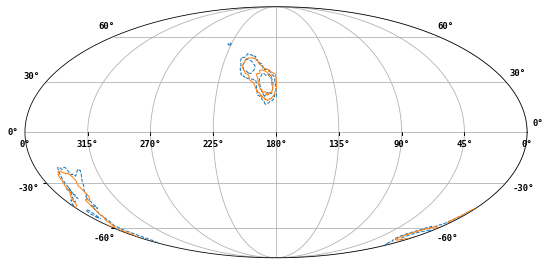

In [20]:
#####################
figpath = 'figs/'
# generate and save the plots:
#plot_skymap(figpath+'GW190521_skymap_figure_moll.pdf', None, skymaps, printArea=True)
gr_fits = '/home1/srashti.goyal/public_html/tgr-lensing/S190521g/27022022_tm_off_GR/samples/ProdF12_data0_1242442967-459473_analysis_H1L1V1_dynesty_merge_skymap.fits'
ngr_fits = '/home1/srashti.goyal/public_html/tgr-lensing/S190521g/27022022_tm_off_nGR_py39/samples/ProdF12_data0_1242442967-459473_analysis_H1L1V1_merge_skymap.fits'
# for the implications paper, only plot final map from NRSur, to reduce clutter:
skymaps = [gr_fits,ngr_fits]
#fitspath+'GW190521_bayestar.fits.gz'
          #'190521_ps_gr.fits',
          #'190521_ps_ngr.fits']
           #fitspath+'GW190521_NRSur7dq4_skymap.fits.gz']

plot_skymap(figpath+'GW190521_skymap_figure_north.pdf', '14h 44d', skymaps, printArea=False)
plot_skymap(figpath+'GW190521_skymap_figure_south.pdf', '23h -55d', skymaps, printArea=False)
plot_skymap(figpath+'GW190521_skymap_figure.pdf', None, skymaps, printArea=True)



# Corner Plots

In [2]:
import bilby

In [3]:
nongr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_nGR_py39/final_result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_merge_result.hdf5'
gr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_GR/result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_dynesty_merge_result.json'

In [4]:
ra = 3.3584716297657375
dec = 0.6078060638702143
redshift = 0.438

In [5]:
event='S190521g'
nongr_bilby = bilby.result.read_in_result(nongr_res)
gr_bilby = bilby.result.read_in_result(gr_res)
plt.rcParams['text.usetex'] = True


In [6]:
labels_ngr= ["$M_c$","q","$a_1$","$a_2$",r'$\iota$',"$d_L$","$\psi$",'$\phi_c$','$t_c$',"$\Delta t_{12}$","$\phi_{lens}$","$\\alpha$","$\delta$"]

pars_ngr =['chirp_mass','mass_ratio','a_1','a_2','theta_jn', "luminosity_distance", 'psi','phase','geocent_time','t12','lens_angle','ra','dec']


labels= ["$M_c$","q","$a_1$","$a_2$",r'$\iota$',"$d_L$","$\psi$",'$\phi_c$','$t_c$',"$\\alpha$","$\delta$"]

pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn', "luminosity_distance", 'psi','phase','geocent_time','ra','dec']



In [7]:
nongr_bilby.log_bayes_factor-gr_bilby.log_bayes_factor

3.212687468560489

In [8]:
print(labels)

['$M_c$', 'q', '$a_1$', '$a_2$', '$\\iota$', '$d_L$', '$\\psi$', '$\\phi_c$', '$t_c$', '$\\alpha$', '$\\delta$']


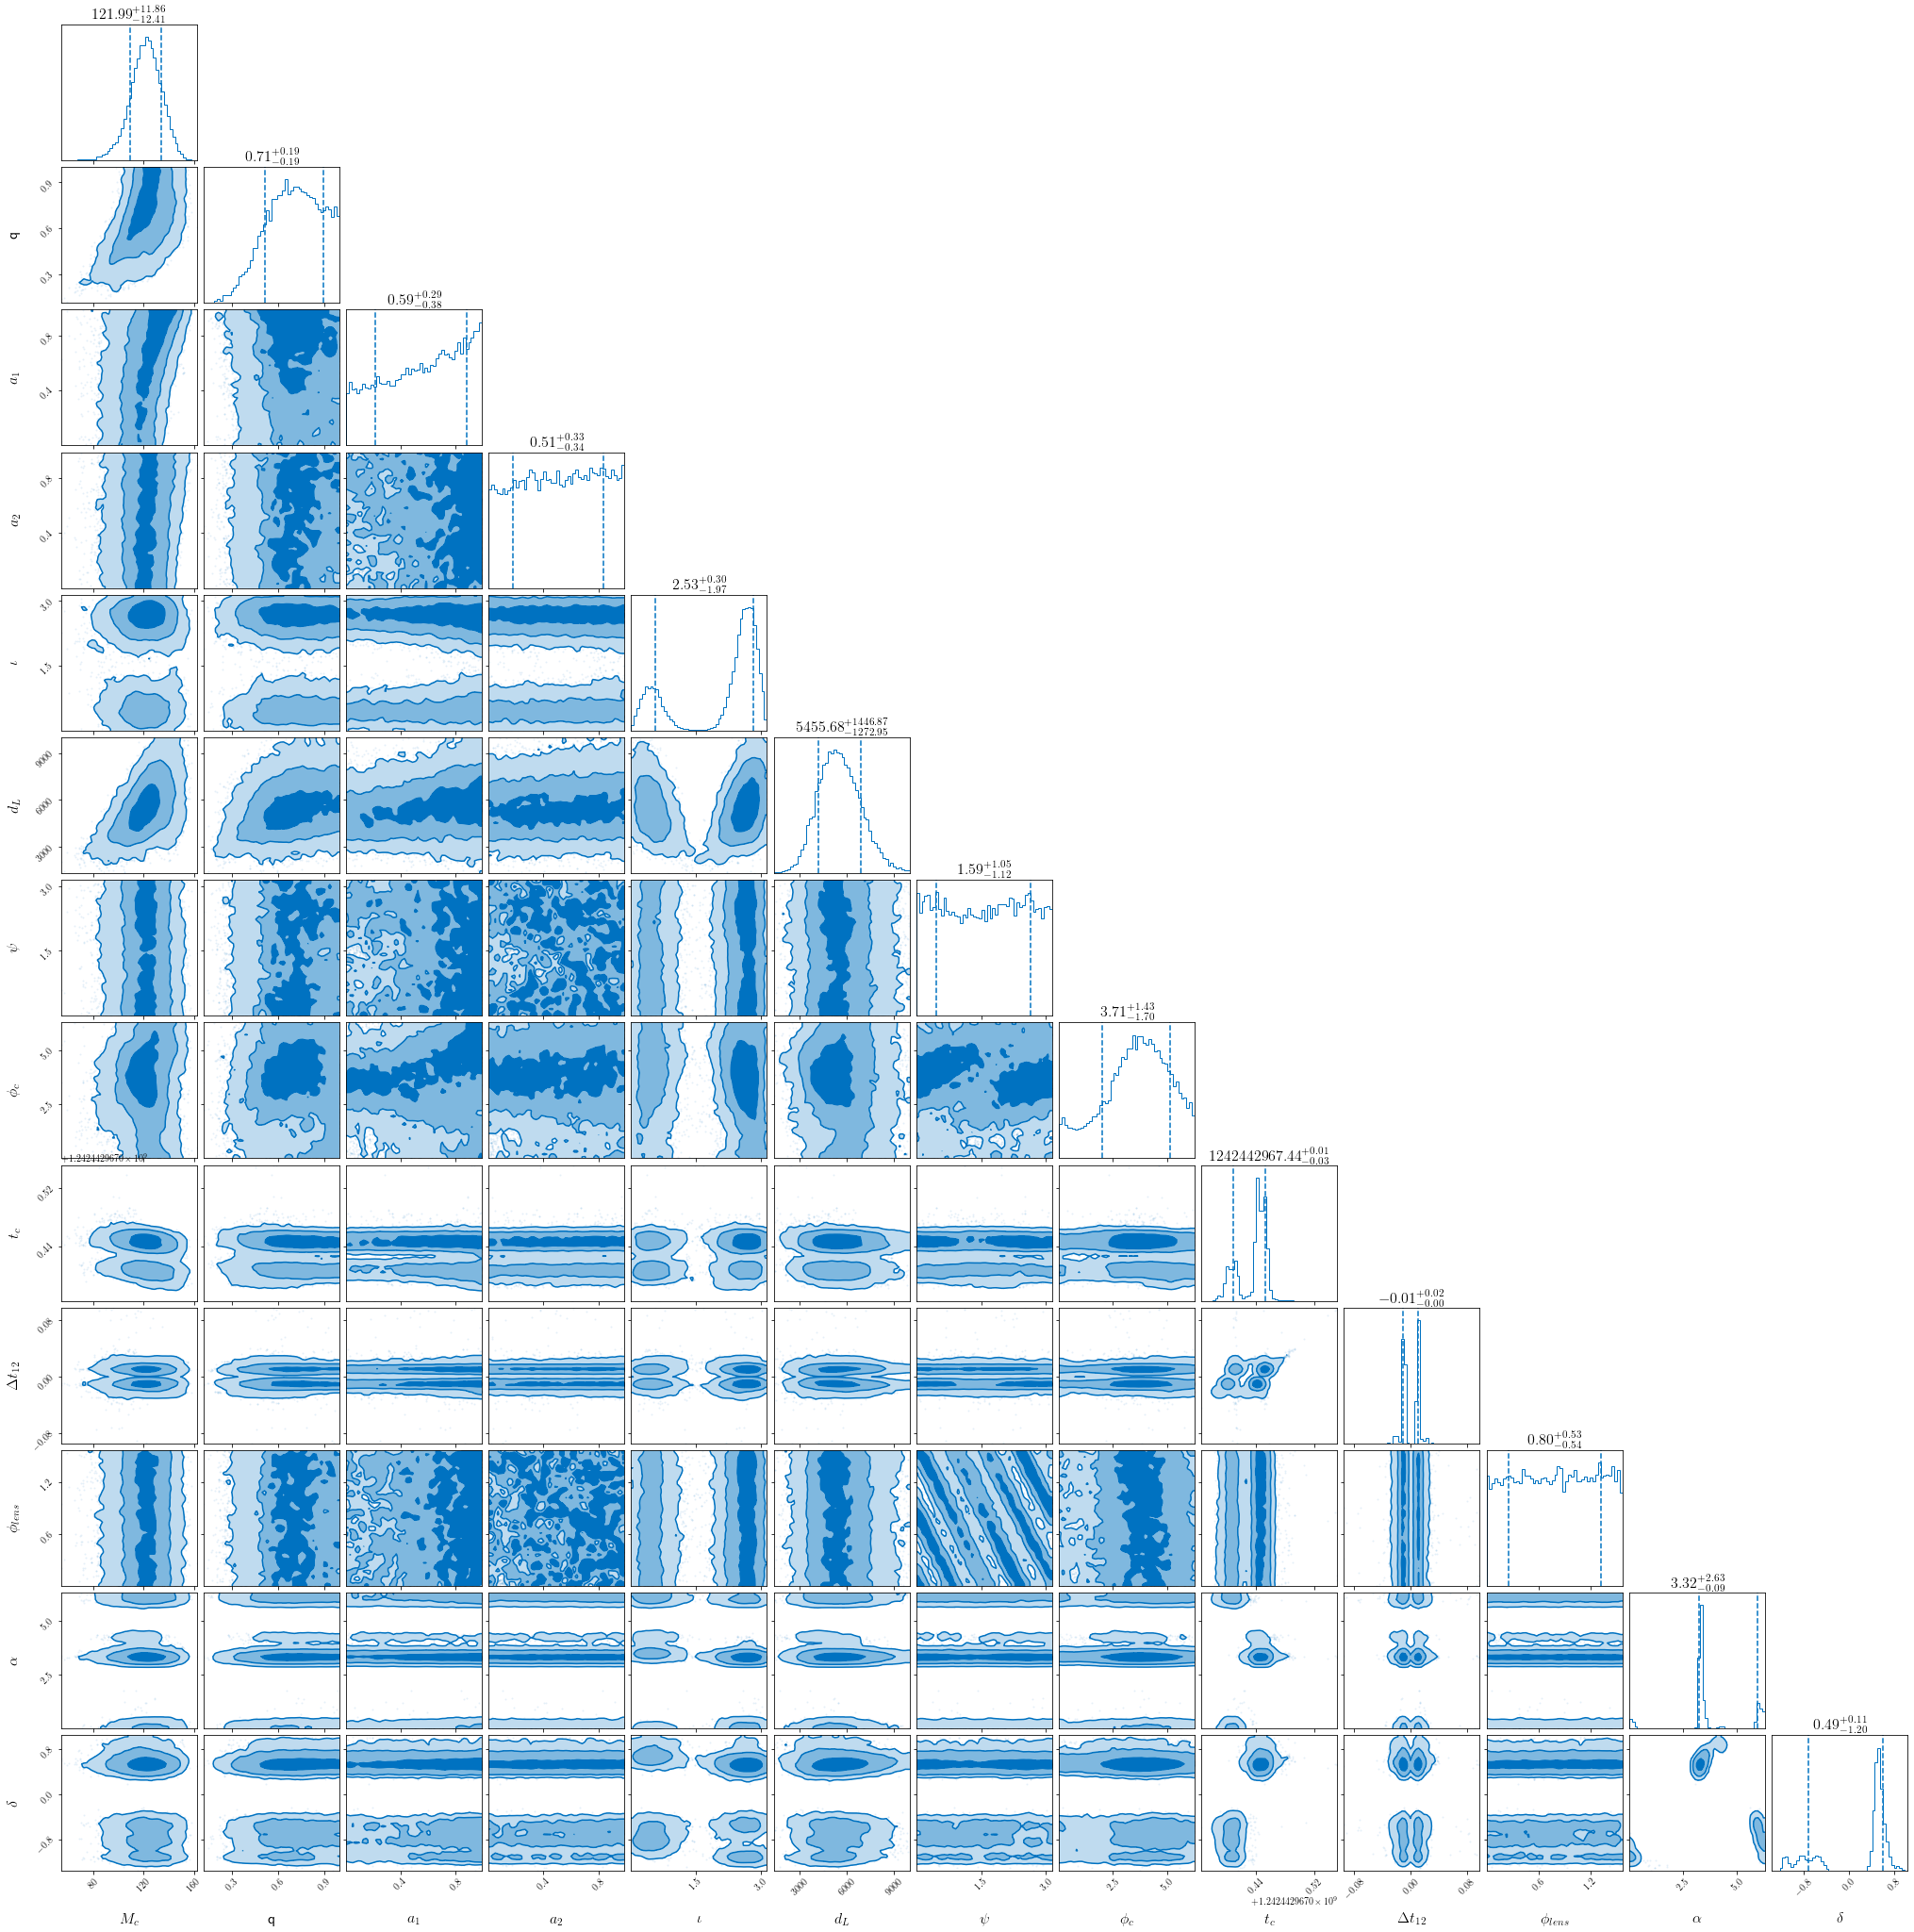

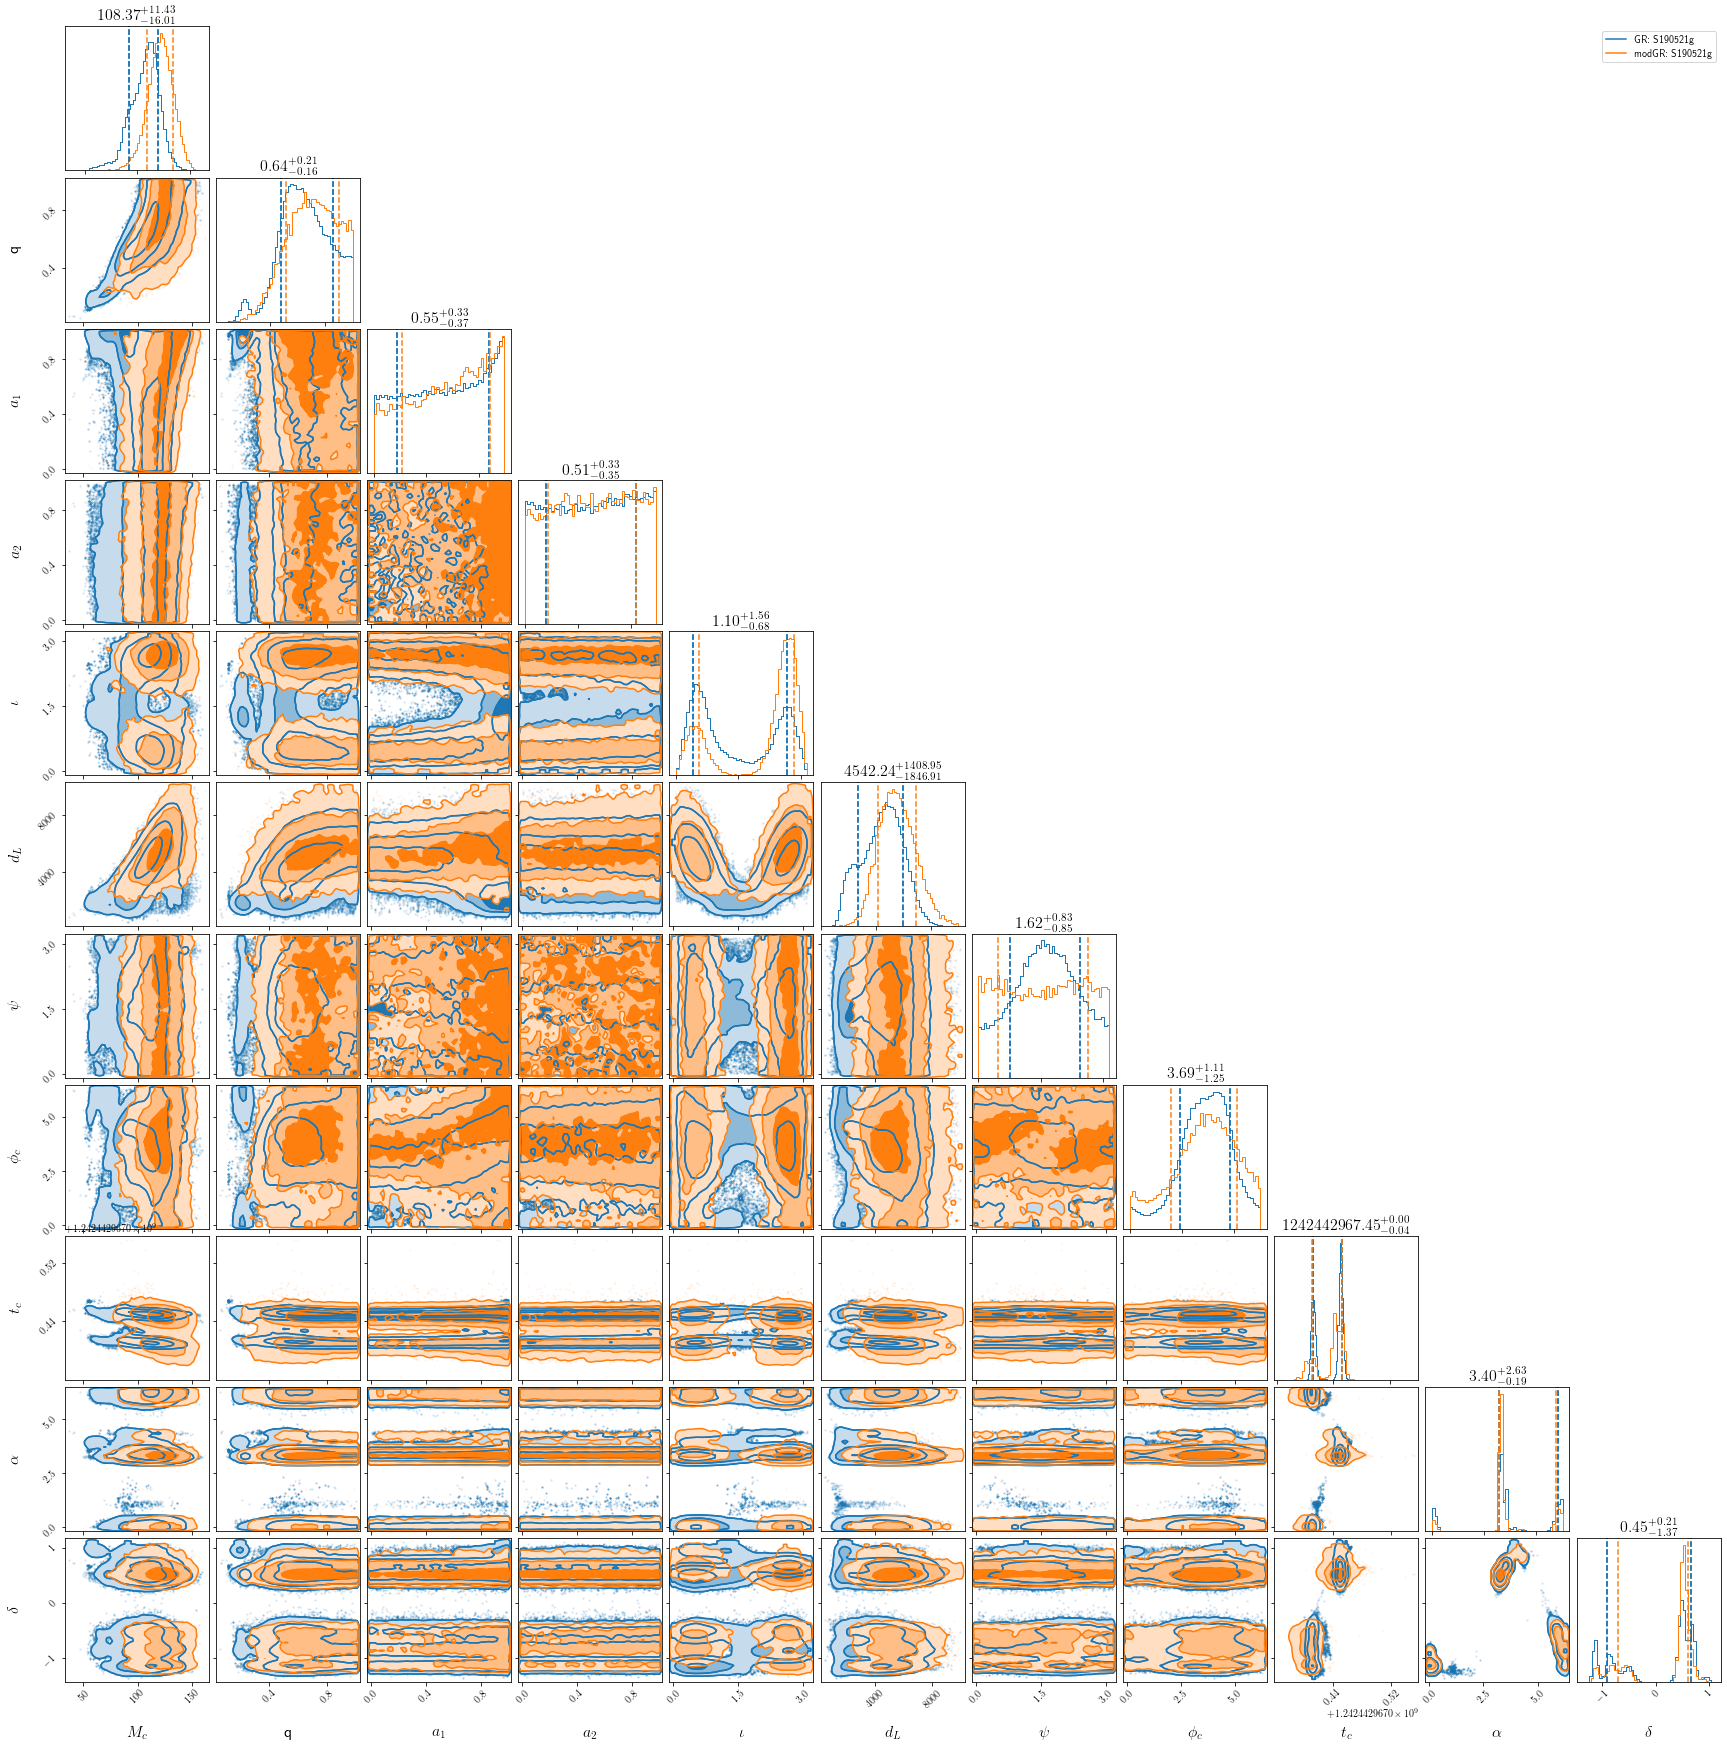

In [10]:
# res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
# 
#["pars"] * len(pars)
figpath='figs/'
nongr_bilby.plot_corner(parameters=pars_ngr, save=False,labels=labels_ngr,filename = figpath+'/nonGR_corner.pdf')

bilby.result.plot_multiple([gr_bilby, nongr_bilby],parameters=pars, save=False,labels=['GR: '+event,'modGR: '+event], fontsize = 14,

                               corner_labels = labels,filename = figpath+'/combined_corner.pdf')


plt.show()

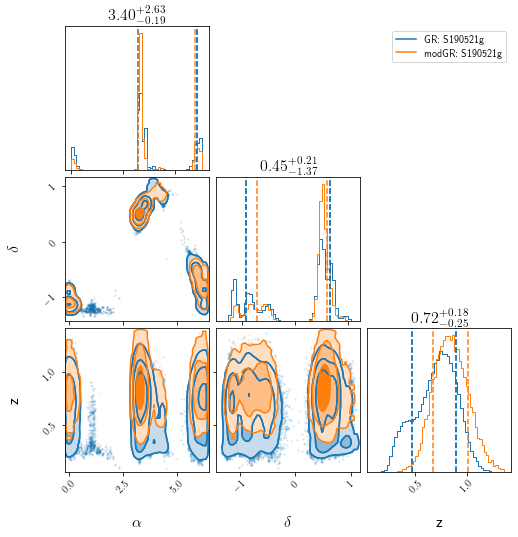

In [11]:
fig=bilby.result.plot_multiple([gr_bilby, nongr_bilby],parameters=['ra','dec','redshift'], save=False,labels=['GR: '+event,'modGR: '+event], fontsize = 14,

                               corner_labels =["$\\alpha$","$\delta$","z"] ,filename = 'figs/combined_corner_sky.pdf')




In [12]:
for i in range(3):
    for j in range(i+1):
        fig.axes[3*i+j].axvline([ra,dec,redshift][j],color='k',ls='dashed',alpha=0.5)

for i in range(1,3):
    for j in range(i):
        fig.axes[3*i+j].axhline([ra,dec,redshift][i],color='k',ls='dashed',alpha=0.5)


        
fig.show()

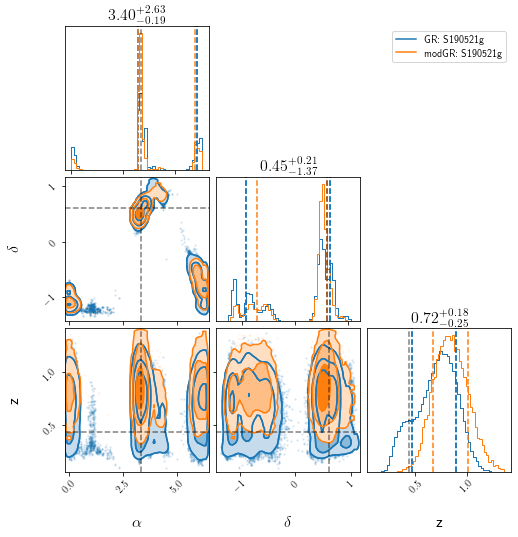

In [13]:
fig

In [14]:
t12, lens_angle = nongr_bilby.posterior["t12"], nongr_bilby.posterior["lens_angle"]
lnl = nongr_bilby.posterior["log_likelihood"]

In [15]:
lnl=nongr_bilby.posterior["log_likelihood"]+nongr_bilby.posterior["log_prior"]

-9.586543103993733 0.06236688169288641


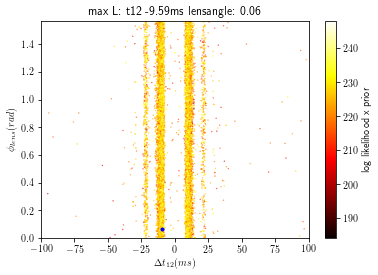

In [16]:
plt.scatter(t12*1000, lens_angle, c=lnl, s=0.1, cmap='hot')
plt.xlim(-100,100)
plt.ylim(0,np.pi/2)
plt.xlabel('$\Delta t_{12}(ms)$')
plt.ylabel('$\phi_{lens}(rad)$')
plt.colorbar(label = 'log likelihood x prior')
maxidx = np.argmax(lnl)
print(t12[maxidx]*1000, lens_angle[maxidx])
plt.plot(t12[maxidx]*1000, lens_angle[maxidx],'.',c='b')
plt.title('max L: t12 ' + str(np.round(t12[maxidx]*1000,2))+ 'ms lensangle: ' + str(np.round(lens_angle[maxidx],2)))
#plt.savefig(figpath+'/combined_2dscatter.pdf')
plt.show()

### waveform and mismatchs

In [72]:
nongr_bilby.posterior.iloc[maxidx]

H1_matched_filter_snr    (7.270872667107989-0.11789821194971793j)
H1_optimal_snr                                           8.093246
L1_matched_filter_snr     (12.486570068498622+1.247120979483966j)
L1_optimal_snr                                           12.88399
V1_matched_filter_snr      (3.03722308608218-0.4484249512564399j)
                                           ...                   
tilt_2                                                   1.491788
total_mass                                             279.940253
total_mass_source                                      142.642943
waveform_approximant                                IMRPhenomXPHM
zenith                                                   1.730197
Name: 2327, Length: 145, dtype: object

In [73]:
maxidx = np.argmax(nongr_bilby.posterior["log_likelihood"]+nongr_bilby.posterior["log_prior"])
max_l_nongr = dict(nongr_bilby.posterior.iloc[maxidx])
maxidx = np.argmax(gr_bilby.posterior["log_likelihood"]+gr_bilby.posterior["log_prior"])
max_l_gr = dict(gr_bilby.posterior.iloc[maxidx])
max_l_gr['t12'],max_l_gr['lens_angle']=0,0

In [53]:
max_l_nongr, max_l_gr

({'chirp_mass': 123.58099379535172,
  'mass_ratio': 0.5927347171080802,
  'a_1': 0.624876692274714,
  'a_2': 0.06076557959067529,
  'theta_jn': 2.7550339828299726,
  'luminosity_distance': 5035.959245826223,
  'psi': 2.3891503767637796,
  'phase': 2.6152283499892306,
  'geocent_time': 1242442967.4399602,
  't12': -0.009586543103993733,
  'lens_angle': 0.06236688169288641,
  'ra': 3.277759226699885,
  'dec': 0.42478936695739145},
 {'chirp_mass': 72.85782723362881,
  'mass_ratio': 0.2234542911361927,
  'a_1': 0.9238129032340545,
  'a_2': 0.2315453207798041,
  'theta_jn': 1.2412139984078205,
  'luminosity_distance': 1660.0097632458503,
  'psi': 1.2642723095484638,
  'phase': 6.014237380128779,
  'geocent_time': 1242442967.444657,
  'ra': 3.2934836041518736,
  'dec': 0.4944353895122757,
  't12': 0,
  'lens_angle': 0})

In [18]:
#gr_bilby.posterior_probability?

In [ ]:
#gr_bilby.search_parameter_keys
gr_bilby.posterior["log_likelihood"]+gr_bilby.posterior["log_prior"]

0         220.595987
1         208.290678
2         206.975325
3         229.409617
4         226.907997
             ...    
216715    222.207293
216716    224.336606
216717    220.597476
216718    227.398307
216719    228.804595
Length: 216720, dtype: float64

### background injs

In [49]:
bilby_params=['mass_1','mass_2', 'luminosity_distance', 'a_1', \
'tilt_1', 'phi_12', 'a_2', 'tilt_2', 'phi_jl', 'theta_jn', 'phase','ra','dec','psi','geocent_time']
inj_dataframe = gr_bilby.posterior[bilby_params].sample(2000).reset_index(drop=True).copy()
inj_dataframe['t12'] = 0
inj_dataframe['lens_angle'] = 0
inj_dataframe

mass_1      mass_2  luminosity_distance       a_1    tilt_1  \
0     156.984261  110.796380          5107.795672  0.166303  0.287586   
1     158.220792  139.223998          1697.468606  0.757500  1.051042   
2     138.079091   65.794643          1836.231600  0.935225  3.082998   
3     157.391514  108.060659          3288.162763  0.329796  0.778294   
4     188.347705   72.227437          4220.375074  0.492157  1.014664   
...          ...         ...                  ...       ...       ...   
1995  138.676623  133.345200          4401.003329  0.052241  0.874301   
1996  138.640376  127.962316          4557.336304  0.063814  1.450922   
1997  143.327762  120.659470          5876.435994  0.272566  0.558197   
1998  139.944366   85.716524          3727.672735  0.723219  2.277666   
1999  147.672866   93.714300          3561.644079  0.963528  2.488314   

        phi_12       a_2    tilt_2    phi_jl  theta_jn     phase        ra  \
0     0.277522  0.093871  0.638140  0.868147  2.849071  2.864346  6.172968   
1     0.994197  0.591018  0.900552  1.152240  1.531540  5.782906  0.033477   
2     3.256786  0.685738  0.532779  4.086029  1.117083  4.105319  6.005057   
3     4.260446  0.165466  2.142063  0.865044  2.211179  2.952853  5.835565   
4     3.109397  0.112829  1.478000  0.832093  2.819099  3.259895  6.091319   
...        ...       ...       ...       ...       ...       ...       ...   
1995  1.408906  0.085501  2.211318  4.603391  2.580665  5.776779  4.450918   
1996  0.844274  0.113288  1.720073  3.784952  2.474798  0.630631  5.777054   
1997  4.668740  0.283118  1.370448  0.357428  2.621173  3.039293  6.131315   
1998  3.745365  0.147754  1.387444  6.197666  2.736094  4.555888  6.261334   
1999  1.414402  0.969199  0.813970  0.981705  0.984989  4.193289  3.330995   

           dec       psi  geocent_time  t12  lens_angle  
0    -0.824487  1.537046  1.242443e+09    0           0  
1    -0.820895  1.496892  1.242443e+09    0           0  
2    -0.585456  2.045687  1.242443e+09    0           0  
3    -0.549854  1.435247  1.242443e+09    0           0  
4    -0.814651  0.184956  1.242443e+09    0           0  
...        ...       ...           ...  ...         ...  
1995  0.940699  0.727150  1.242443e+09    0           0  
1996 -0.468626  1.676656  1.242443e+09    0           0  
1997 -0.794435  1.706053  1.242443e+09    0           0  
1998 -0.867226  2.780210  1.242443e+09    0           0  
1999  0.487604  1.597495  1.242443e+09    0           0  

[2000 rows x 17 columns]

In [51]:
inj_dataframe.iloc[3].to_dict()

{'mass_1': 157.39151431259015,
 'mass_2': 108.06065858467183,
 'luminosity_distance': 3288.1627625473398,
 'a_1': 0.3297964220175236,
 'tilt_1': 0.7782943008594577,
 'phi_12': 4.260445557630907,
 'a_2': 0.16546580696082003,
 'tilt_2': 2.1420625795655375,
 'phi_jl': 0.8650440088860958,
 'theta_jn': 2.2111786396132262,
 'phase': 2.9528526461840374,
 'ra': 5.8355649317544405,
 'dec': -0.549854111198349,
 'psi': 1.4352470962336692,
 'geocent_time': 1242442967.4122715,
 't12': 0.0,
 'lens_angle': 0.0}

In [53]:
#inj_dataframe.to_csv('population_study_GRinjs_2000_27022022_tm_off_GR.dat',index=False,header=True,sep=' ')


In [52]:
#inj_dataframe.to_json('population_study_GRinjs_2000_27022022_tm_off_GR.json')


In [ ]:
bilby.gw.utils.calculate_time_to_merger(20,153,101)

In [41]:
import pycbc.pnutils as pn
pn._get_imr_duration(153, 101, 1, 1, 15, approximant="IMRPhenomD")

0.4323714940695091

# Strain Data

In [42]:
%matplotlib inline

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# matplotlib params for pub-quality plots
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['legend.fontsize'] = 9

# LIGO-specific software:
from gwpy.timeseries import TimeSeries   # https://gwpy.github.io/

In [43]:
event = "GW190521"
trigtime=1242442967.447
f_range=(9, 400)
q_range=(6,6)
searchwin=0.1
outseg=(-4+trigtime,4+trigtime)
delta_t=1./1024
times = np.arange(outseg[0],outseg[1],delta_t)

dets=["H1","L1","V1"]
det_names = ['Hanford','Livingston','Virgo']

In [44]:
data_dir='GW190521_discovery_Fig1/'
white_data = [np.genfromtxt("./{}/whitened_data_{}.dat".format(data_dir,det)) for det in dets]
LI_data    = [np.genfromtxt("./{}/{}_summary_waveforms_samples.dat".format(data_dir,det), names=True) for det in dets]
BW_data    = [np.genfromtxt("./{}/signal_median_time_domain_waveform_{}.dat".format(data_dir,det)) for det in dets]
cwb_data   = [np.genfromtxt("./{}/{}_pewave_cr.txt".format(data_dir,det), names=True) for det in dets]

In [45]:
import scipy.signal as sig

sample_rate = 1024.0
nsamples = 4096
t = np.arange(nsamples) / sample_rate
nyq_rate = sample_rate / 2.0
width = 8.0/nyq_rate
ripple_db = 10
N, beta = sig.kaiserord(ripple_db, width)
cutoff_hz = 128

# low pass filter the data
taps = sig.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
temp = [sig.lfilter(taps, 1.0, x) for x in white_data]
temp = [np.flipud(x) for x in temp]
temp = [sig.lfilter(taps, 1.0, x) for x in temp]
low_pass_data = [np.flipud(x) for x in temp]

In [46]:
white_data = [TimeSeries(data=wd, dt=delta_t, t0=times[0]) for w,wd in enumerate(white_data)]
low_pass_data = [TimeSeries(data=wd, dt=delta_t, t0=times[0]) for w,wd in enumerate(low_pass_data)]

# LALInference (LI) intervals 
li_intervals = []
for i, det in enumerate(dets):
    li_intervals.append([ LI_data[i][bound] 
                         for b,bound in enumerate(
                             ["whitened_lower_bound_90", "whitened_ML", "whitened_upper_bound_90"])
                        ])
    
# bayeswave intervals file: Time | median | lower50 | upp50 | lower90 | upp90
bw_intervals =[]
for i, det in enumerate(dets):
    bw_intervals.append( [ BW_data[i][:,b] for b in [ 4, 5] ])


In [47]:
print("Making white-noisy Q-scans")

# warnings from qtransform are ignorable
import warnings
warnings.simplefilter('ignore', category=UserWarning)

qscans_white_noisy = [wd.q_transform(frange=f_range, qrange=q_range, 
                         outseg=outseg, whiten=False) for wd in white_data]

qtimes = qscans_white_noisy[0].xindex.value
qfreqs = qscans_white_noisy[0].yindex.value
print(qfreqs)

Making white-noisy Q-scans
[  9.    9.5  10.  ... 328.5 329.  329.5]


In [48]:
white_data

[<TimeSeries([-0.2961522,  0.3996053, -0.1842186, ...,  0.3025401,
              -0.4453752,  0.3025922]
             unit=Unit(dimensionless),
             t0=<Quantity 1.24244296e+09 s>,
             dt=<Quantity 0.00097656 s>,
             name=None,
             channel=None)>,
 <TimeSeries([ 0.2179519,  0.9143816, -0.3193425, ...,  1.3635   ,
               0.1883609,  0.8497734]
             unit=Unit(dimensionless),
             t0=<Quantity 1.24244296e+09 s>,
             dt=<Quantity 0.00097656 s>,
             name=None,
             channel=None)>,
 <TimeSeries([-0.1831276 , -0.07038483, -0.6095567 , ...,
              -0.245     ,  0.7299728 , -0.02194983]
             unit=Unit(dimensionless),
             t0=<Quantity 1.24244296e+09 s>,
             dt=<Quantity 0.00097656 s>,
             name=None,
             channel=None)>]

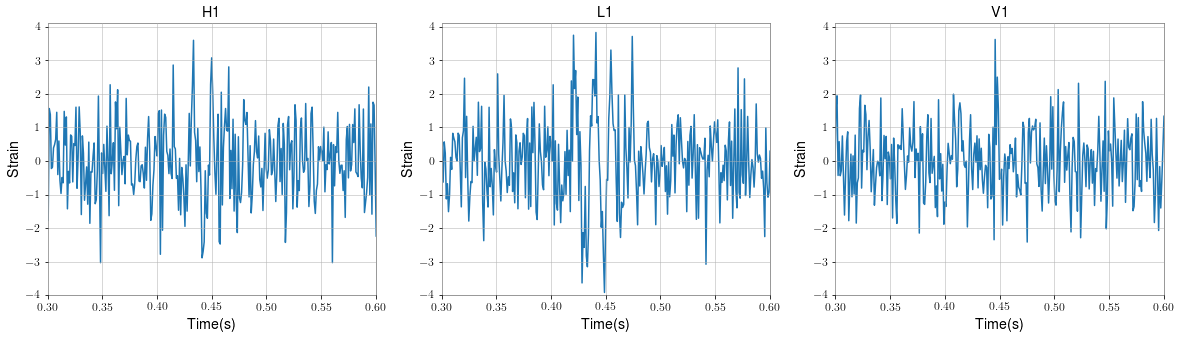

In [49]:
nanosecond=np.mod(1242442967.44726562,1)
origin=1242442967
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.array(white_data[i].xindex)-origin, white_data[i]) 
    plt.xlim(0.3, 0.6) 
    plt.ylim(-4, 4.1)
    plt.xlabel('Time(s)')
    plt.ylabel('Strain')
    plt.title(dets[i])
plt.show()

### adding WFs

In [ ]:
from tgrlensing import waveform_model
import os
import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse


from pycbc.psd import interpolate, inverse_spectrum_truncation

event='S190521g'

{'H1': 'H1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01',
 'L1': 'L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01',
 'V1': 'V1:Hrec_hoft_16384Hz'}

In [63]:
fileName = '/home1/srashti.goyal/tgr-lensing/codes/real_events/EventConfigs_edited.json'
file = open(fileName)
data = json.load(file)

event_specs = data['%s'%event]
channel_dict=event_specs['channels']
trigger_time = event_specs['trigger_time']
minimum_frequencies = event_specs['minimum_frequency']
maximum_frequencies = event_specs['maximum_frequency']
duration = 4#event_specs['duration']
sampling_frequency = event_specs['sampling_frequency']
reference_frequency = event_specs['reference_frequency']

gps_start_time = trigger_time + 2 - duration


# setup the interferometers that should be used
interferometers = bilby.gw.detector.InterferometerList(channel_dict.keys())
waveform_arguments = dict(waveform_approximant = 'IMRPhenomXPHM', reference_frequency = reference_frequency)
waveform_generator = bilby.gw.WaveformGenerator(duration = duration, sampling_frequency = sampling_frequency, frequency_domain_source_model = waveform_model.ModelGenericBeyondGRLensingBBH, waveform_arguments = waveform_arguments)



11:04 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: tgrlensing.waveform_model.ModelGenericBeyondGRLensingBBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [66]:
max_l_nongr

{'chirp_mass': 123.58099379535172,
 'mass_ratio': 0.5927347171080802,
 'a_1': 0.624876692274714,
 'a_2': 0.06076557959067529,
 'theta_jn': 2.7550339828299726,
 'luminosity_distance': 5035.959245826223,
 'psi': 2.3891503767637796,
 'phase': 2.6152283499892306,
 'geocent_time': 1242442967.4399602,
 't12': -0.009586543103993733,
 'lens_angle': 0.06236688169288641,
 'ra': 3.277759226699885,
 'dec': 0.42478936695739145}

In [74]:

ifos2 = bilby.gw.detector.InterferometerList(channel_dict.keys())
ifos3 = bilby.gw.detector.InterferometerList(channel_dict.keys())

ifos2.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=gps_start_time)
ifos3.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=gps_start_time)
injection_gr = ifos2.inject_signal(waveform_generator=waveform_generator,parameters=max_l_gr)

injection_nongr = ifos3.inject_signal(waveform_generator=waveform_generator,parameters=max_l_nongr)




11:08 bilby INFO    : Injected signal in H1:
11:08 bilby INFO    :   optimal SNR = 14.95
11:08 bilby INFO    :   matched filter SNR = 14.95+0.00j
11:08 bilby INFO    :   chirp_mass = 72.85782723362881
11:08 bilby INFO    :   mass_ratio = 0.2234542911361927
11:08 bilby INFO    :   a_1 = 0.9238129032340545
11:08 bilby INFO    :   a_2 = 0.2315453207798041
11:08 bilby INFO    :   tilt_1 = 2.3975749586992086
11:08 bilby INFO    :   tilt_2 = 1.2796901916440346
11:08 bilby INFO    :   phi_12 = 0.1300805639573906
11:08 bilby INFO    :   phi_jl = 1.8268045822594208
11:08 bilby INFO    :   theta_jn = 1.2412139984078205
11:08 bilby INFO    :   psi = 1.2642723095484638
11:08 bilby INFO    :   phase = 6.014237380128779
11:08 bilby INFO    :   azimuth = 5.079163106226374
11:08 bilby INFO    :   zenith = 1.7823595022325978
11:08 bilby INFO    :   geocent_time = 1242442967.444657
11:08 bilby INFO    :   recalib_H1_amplitude_0 = 0.0013496622470417878
11:08 bilby INFO    :   recalib_H1_amplitude_1 = -0.

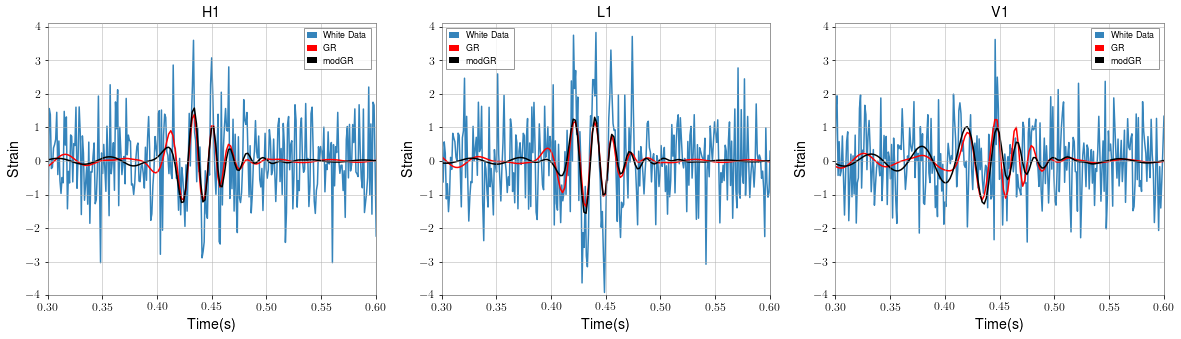

In [75]:
nanosecond=np.mod(1242442967.44726562,1)
origin=1242442967
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.array(white_data[i].xindex)-origin, white_data[i], label = 'White Data',alpha = 0.9,c='C0') 
    plt.xlim(0.3, 0.6) 
    plt.ylim(-4, 4.1)
    plt.xlabel('Time(s)')
    plt.ylabel('Strain')
    plt.title(dets[i])
    #det = ifos1[i]

    #ax[i].plot(det.strain_data.time_array,
    #          det.strain_data.time_domain_strain, color='C2',
    #          label= ' real data ')#$\Delta t_{12}$ =  '+ str(t12_arr[0])+ ', $\phi_{lens}$ = '+ str(lens_angle_arr[0])[:4])
   
    det = ifos2[i]

    #ax.set_xtick

    factor= 1e-1/np.std(det.strain_data.time_domain_strain)
    plt.plot(det.strain_data.time_array-origin,
              factor*det.strain_data.time_domain_strain,color='r',
              label= 'GR')

   
    det = ifos3[i]
    factor= 1e-1/np.std(det.strain_data.time_domain_strain)


    plt.plot(det.strain_data.time_array-origin,
              factor*det.strain_data.time_domain_strain,color='k',
              label= 'modGR')
    plt.legend()
    #gps_time= trigger_time
plt.savefig('figs/white_strain_maxL_WFs.pdf')
plt.show()

# Background analysis

In [2]:
import bilby
background_df = pd.DataFrame()

In [4]:
i=0
gr_res='/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/background/GR_rec_09092022/final_result/GRinj_GR_rec_1_100_data%d_1242442967-459473_analysis_H1L1V1_merge_result.json'%i

In [5]:
background_df['gr_res'] = ['/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/background/GR_rec_09092022/final_result/GRinj_GR_rec_1_100_data%d_1242442967-459473_analysis_H1L1V1_merge_result.json'%i for i in range(100)]
background_df['nongr_res'] = ['/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/background/nGR_rec_09092022/final_result/GRinj_nGR_rec_1_100_data%d_1242442967-459473_analysis_H1L1V1_merge_result.json'%i for i in range(100)]

background_df['injection number'] = range(100)

In [6]:
background_df['GR logBF']=''
background_df['nGR logBF']=''
background_df['GR logZ']=''

background_df['nGR logZ']=''




In [7]:
for i in background_df.index.values:
    res= bilby.result.read_in_result(background_df.iloc[i]['gr_res'])
    background_df.loc[i,'GR logZ']=res.log_evidence
    background_df.loc[i,'GR logBF']=res.log_bayes_factor
    res = bilby.result.read_in_result(background_df.iloc[i]['nongr_res'])
    background_df.loc[i,'nGR logZ']=res.log_evidence
    background_df.loc[i,'nGR logBF']=res.log_bayes_factor



In [8]:
background_df.tail()

gr_res  \
95  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
96  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
97  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
98  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
99  /home1/srashti.goyal/tgr-lensing/codes/S190521...   

                                            nongr_res  injection number  \
95  /home1/srashti.goyal/tgr-lensing/codes/S190521...                95   
96  /home1/srashti.goyal/tgr-lensing/codes/S190521...                96   
97  /home1/srashti.goyal/tgr-lensing/codes/S190521...                97   
98  /home1/srashti.goyal/tgr-lensing/codes/S190521...                98   
99  /home1/srashti.goyal/tgr-lensing/codes/S190521...                99   

     GR logBF  nGR logBF      GR logZ     nGR logZ  
95  78.028026  69.368864 -2377.803555 -2375.719361  
96  78.465043  81.314011 -2469.525672 -2575.475622  
97  36.789997  46.962678 -2482.372203 -2405.835424  
98  86.276721   75.31419 -2427.257294 -2503.618858  
99  54.641025  67.039818  -2459.41417 -2463.753456

In [9]:
background_df['log_Z_ngr_gr']=background_df['nGR logZ']-background_df['GR logZ']
background_df['log_BF_ngr_gr']=background_df['nGR logBF']-background_df['GR logBF']

In [13]:
plt.figure(figsize=(5,4))
import matplotlib.lines as mlines

bins=np.linspace(-40,35,20)
d,b,f=plt.hist(background_df['log_Z_ngr_gr'],bins=bins,lw=2,histtype='step',density=True,cumulative=-1,label='background',alpha=0.5)
fg_bf = 3.21
plt.plot((b[1:]+b[:-1])/2,d,color='C0')
FAP=np.interp(fg_bf,(b[1:]+b[:-1])/2,d)
#plt.axvline(fg_bf,ls='dashed',color = 'k',label='GW190521')
#plt.axhline(FAP,ls='dashed',color = 'k')
plt.plot([fg_bf,fg_bf],[0,FAP],ls='dashed',color = 'k',label='GW190521',alpha=0.7)
plt.plot([b[0],fg_bf],[FAP,FAP],ls='dashed',color = 'k',alpha=0.7)


plt.text(fg_bf+2,FAP+0.05,str(fg_bf)+', ' + str(FAP)[:4],bbox=dict(boxstyle="square",fill=None
                   ,color='r'))
plt.xlim(bins[0],bins[-1])
plt.legend()
plt.grid()
plt.xlabel('$\log \mathcal{B}^{modGR}_{GR}$')
plt.ylabel('FAP')
plt.savefig('figs/background_Z_ngr_gr.pdf')
plt.show()

In [11]:
background_df.tail()

gr_res  \
95  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
96  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
97  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
98  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
99  /home1/srashti.goyal/tgr-lensing/codes/S190521...   

                                            nongr_res  injection number  \
95  /home1/srashti.goyal/tgr-lensing/codes/S190521...                95   
96  /home1/srashti.goyal/tgr-lensing/codes/S190521...                96   
97  /home1/srashti.goyal/tgr-lensing/codes/S190521...                97   
98  /home1/srashti.goyal/tgr-lensing/codes/S190521...                98   
99  /home1/srashti.goyal/tgr-lensing/codes/S190521...                99   

     GR logBF  nGR logBF      GR logZ     nGR logZ log_Z_ngr_gr log_BF_ngr_gr  
95  78.028026  69.368864 -2377.803555 -2375.719361     2.084194     -8.659162  
96  78.465043  81.314011 -2469.525672 -2575.475622   -105.94995      2.848968  
97  36.789997  46.962678 -2482.372203 -2405.835424    76.536779     10.172681  
98  86.276721   75.31419 -2427.257294 -2503.618858   -76.361564    -10.962531  
99  54.641025  67.039818  -2459.41417 -2463.753456    -4.339286     12.398793

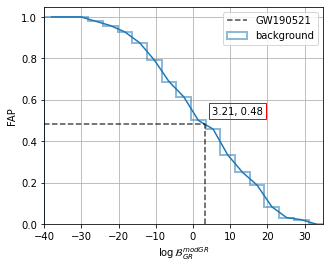

In [14]:
plt.figure(figsize=(5,4))
import matplotlib.lines as mlines

bins=np.linspace(-40,35,20)
d,b,f=plt.hist(background_df['log_BF_ngr_gr'],bins=bins,lw=2,histtype='step',density=True,cumulative=-1,label='background',alpha=0.5)
fg_bf = 3.21
plt.plot((b[1:]+b[:-1])/2,d,color='C0')
FAP=np.interp(fg_bf,(b[1:]+b[:-1])/2,d)
#plt.axvline(fg_bf,ls='dashed',color = 'k',label='GW190521')
#plt.axhline(FAP,ls='dashed',color = 'k')
plt.plot([fg_bf,fg_bf],[0,FAP],ls='dashed',color = 'k',label='GW190521',alpha=0.7)
plt.plot([b[0],fg_bf],[FAP,FAP],ls='dashed',color = 'k',alpha=0.7)


plt.text(fg_bf+2,FAP+0.05,str(fg_bf)+', ' + str(FAP)[:4],bbox=dict(boxstyle="square",fill=None
                   ,color='r'))
plt.xlim(bins[0],bins[-1])
plt.legend()
plt.grid()
plt.xlabel('$\log \mathcal{B}^{modGR}_{GR}$')
plt.ylabel('FAP')
plt.savefig('figs/background_BF_ngr_gr.pdf')
plt.show()

In [12]:
background_df.to_csv('background_190521.csv')